In [1]:
%matplotlib inline

## Time to build a neural network!
First let's import some prerequisites

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
#pegar outro dataset
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

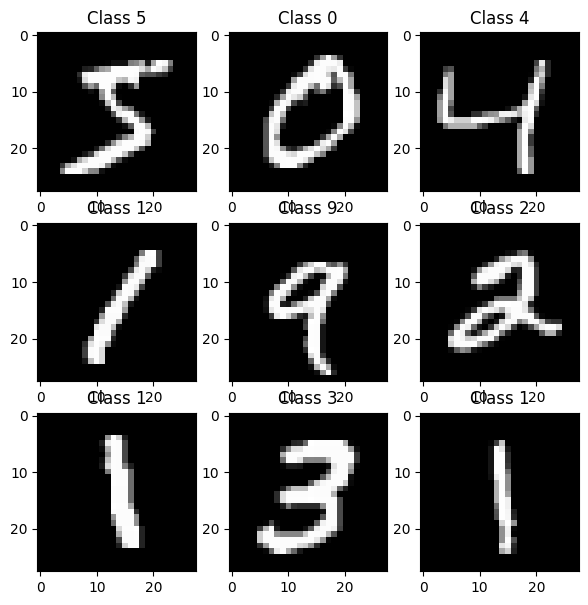

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="figure.png" />

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [9]:
model.fit(X_train, Y_train,
          batch_size=128, 
          epochs=4,
          #show_accuracy=True, 
          verbose=1,
          validation_data=(X_test, Y_test)
          )

Epoch 1/4
469/469 [==============================] - 9s 17ms/step - loss: 0.2536 - accuracy: 0.9240 - val_loss: 0.1172 - val_accuracy: 0.9640
Epoch 2/4
469/469 [==============================] - 8s 16ms/step - loss: 0.1037 - accuracy: 0.9689 - val_loss: 0.0891 - val_accuracy: 0.9700
Epoch 3/4
469/469 [==============================] - 8s 16ms/step - loss: 0.0732 - accuracy: 0.9770 - val_loss: 0.0700 - val_accuracy: 0.9797
Epoch 4/4
469/469 [==============================] - 8s 16ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0732 - val_accuracy: 0.9777


## Finally, evaluate its performance

In [10]:
score = model.evaluate(X_test, Y_test,
                       #show_accuracy=True, 
                       verbose=0)
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

[0.07318386435508728, 0.9776999950408936]
Test score: 0.07318386435508728
Test accuracy: 0.9776999950408936


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [11]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
#predicted_classes = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)


# Check which items we got right / wrong
correct_indices = np.nonzero(classes_x == y_test)[0]
incorrect_indices = np.nonzero(classes_x != y_test)[0]

313/313 [==============================] - 1s 3ms/step


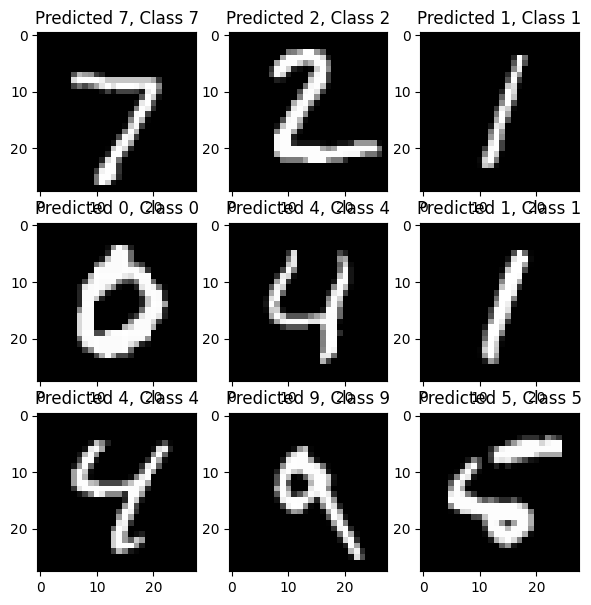

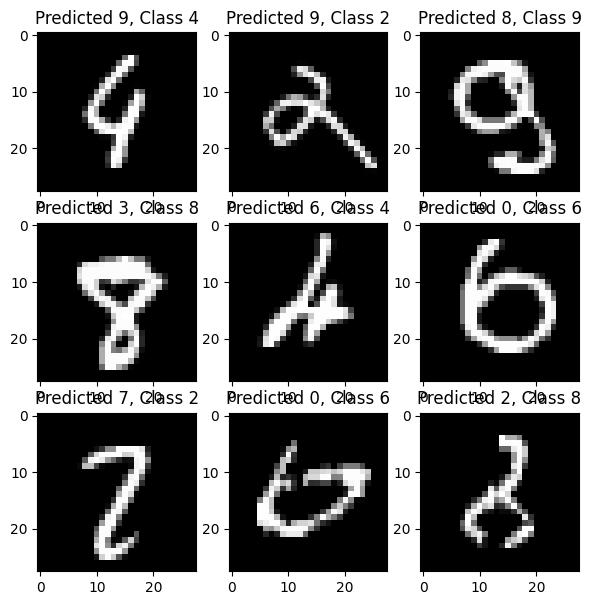

In [12]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_test[incorrect]))